In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\sergi\\Proyectos\\Proyecto_Final\\data\\processed\\vehicles_clean_fact.csv", quotechar='"')

df = df.drop(columns = ["lat", "long"])

df

,price,year,manufacturer,model,fuel,odometer,transmission,drive,size,type,state
0,22590,2010.0,0,0,0,71229.0,0,0,0,0,0
1,30990,2017.0,1,1,0,41124.0,0,0,0,0,0
2,15000,2013.0,2,2,0,128000.0,1,1,0,1,0
3,35000,2019.0,1,3,0,43000.0,1,0,1,1,0
4,29990,2016.0,0,4,0,17302.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
283121,29590,2016.0,1,149,0,53475.0,1,0,0,4,50
283122,0,2010.0,1,144,0,155000.0,1,0,1,11,50
283123,32590,2020.0,11,418,0,19059.0,0,1,2,6,50
283124,33590,2018.0,18,1474,0,30814.0,1,1,1,6,50


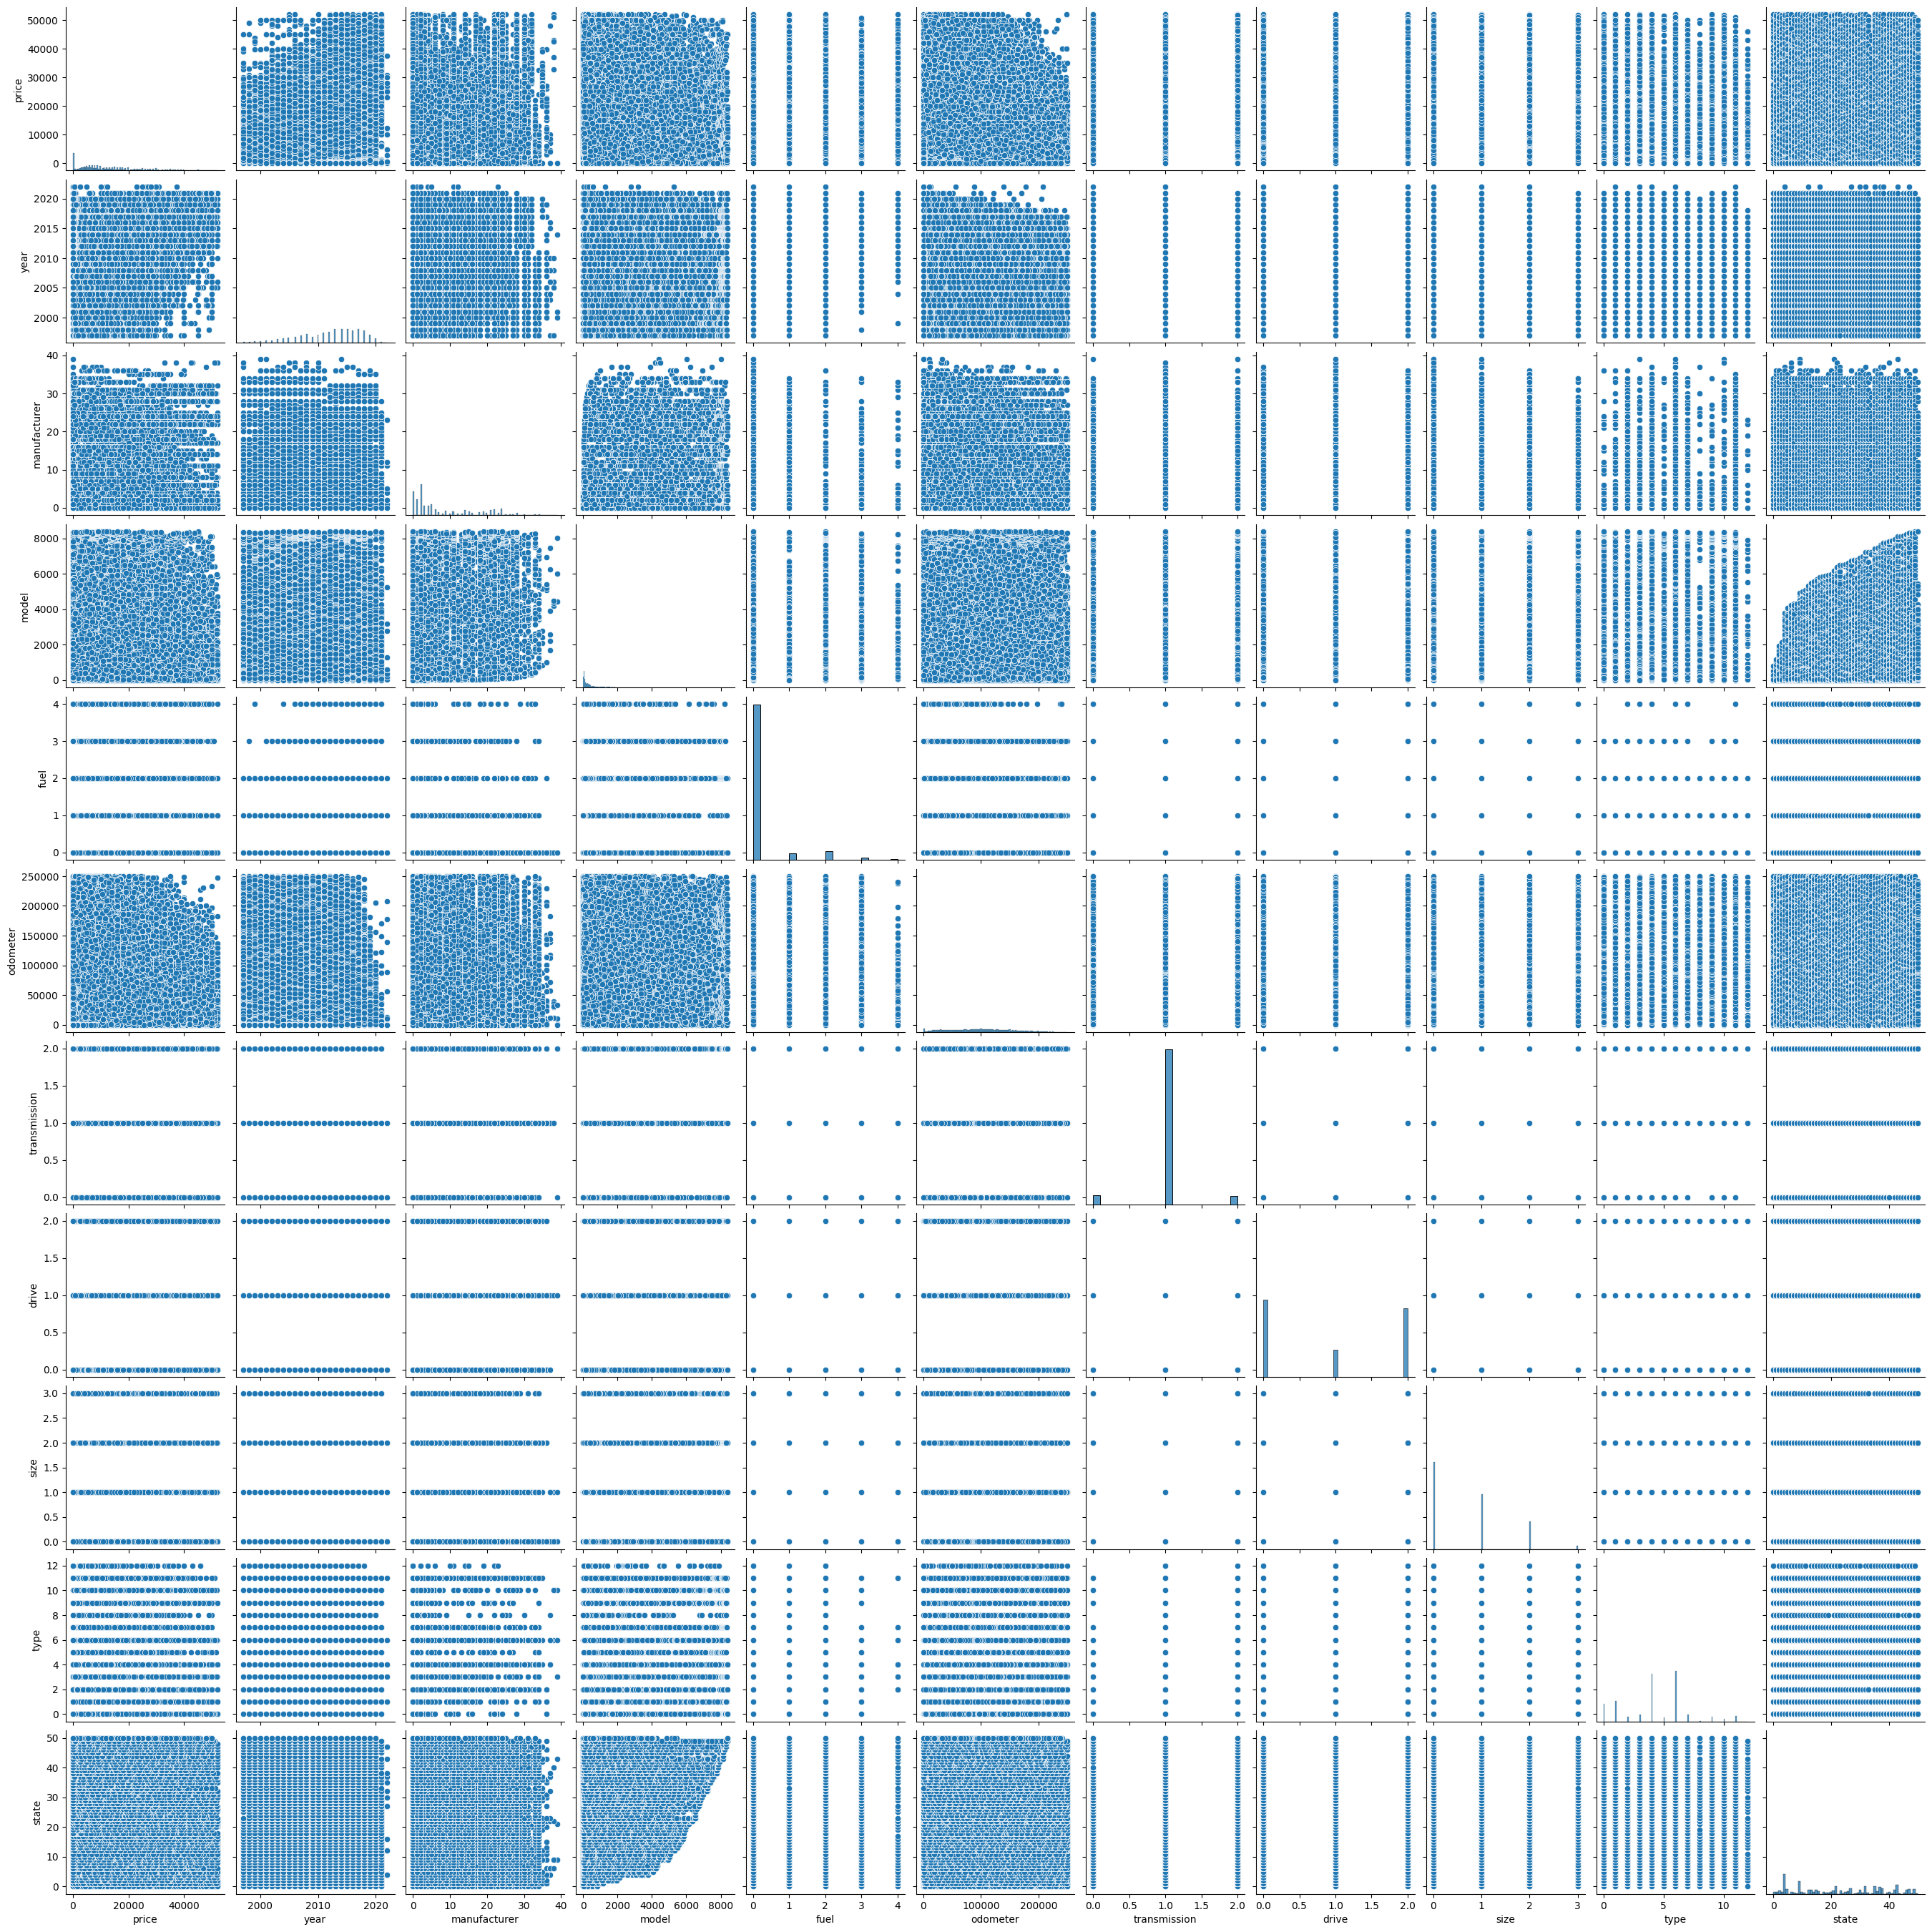

In [2]:
import seaborn as sns

sns.pairplot(data=df)

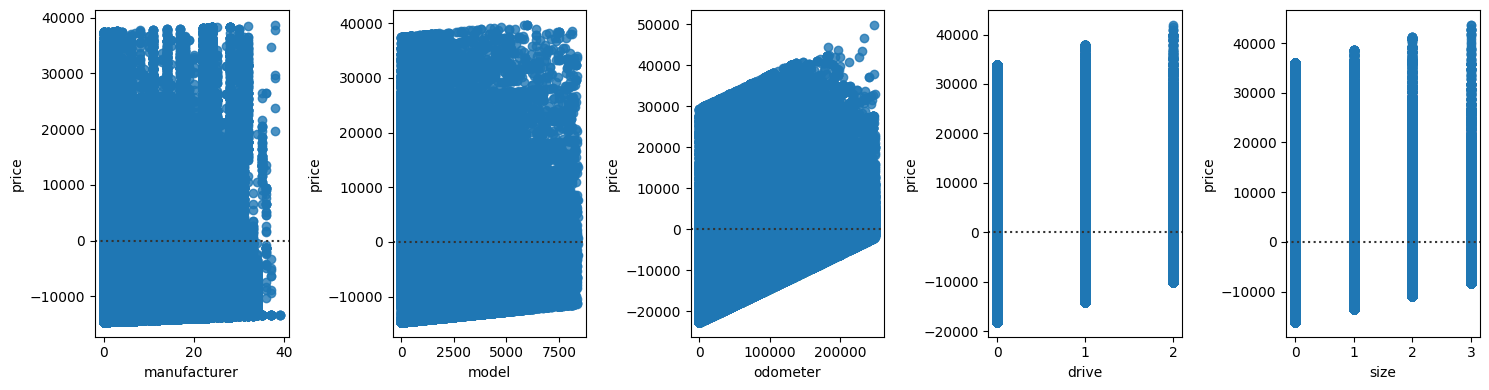

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 4))

sns.residplot(x='manufacturer', y='price', data=df, ax = axes[0])
sns.residplot(x='model', y='price', data=df, ax = axes[1])
sns.residplot(x='odometer', y='price', data=df, ax = axes[2])
sns.residplot(x='drive', y='price', data=df, ax = axes[3])
sns.residplot(x='size', y='price', data=df, ax = axes[4])

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
from scipy.stats import shapiro, normaltest, anderson
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Prueba de Shapiro-Wilk
for col in df:
    stat, p = shapiro(df[col])
    print(f"Shapiro-Wilk test for {col}: Statistics={stat}, p-value={p}")

# Prueba de D'Agostino y Pearson
for col in df:
    stat, p = normaltest(df[col])
    print(f"D'Agostino and Pearson's test for {col}: Statistics={stat}, p-value={p}")




c:\Users\sergi\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 283126.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for price: Statistics=0.9143478815163921, p-value=3.75381838982541e-129
Shapiro-Wilk test for year: Statistics=0.9564077421607794, p-value=7.426878896519763e-110
Shapiro-Wilk test for manufacturer: Statistics=0.8286719517824237, p-value=1.3149284641313244e-150
Shapiro-Wilk test for model: Statistics=0.6285398317211188, p-value=1.5725219435031188e-176
Shapiro-Wilk test for fuel: Statistics=0.34452822099772196, p-value=7.054587423053065e-197
Shapiro-Wilk test for odometer: Statistics=0.9818686347805072, p-value=3.693803411581584e-87
Shapiro-Wilk test for transmission: Statistics=0.4334503598006634, p-value=1.5103314077216573e-191
Shapiro-Wilk test for drive: Statistics=0.7250067710930959, p-value=3.283797645145573e-166
Shapiro-Wilk test for size: Statistics=0.7722611685721185, p-value=6.713161079087151e-160
Shapiro-Wilk test for type: Statistics=0.9239066512351386, p-value=1.1741563649709211e-125
Shapiro-Wilk test for state: Statistics=0.9276471711099661, p-value=3.4980